In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas as pd
import os
import random
import shutil
import matplotlib.pyplot as plt
# from sklearn.metrics import f1_score, recall_score, 

In [ ]:
classes = os.listdir('product_images')
print(classes)

In [1]:
train_len = {}
test_len = {}
validation_len = {}
for i in classes:
    train_len[i] = len(os.listdir(os.path.join('product_images', 'train', i)))
    test_len[i] = len(os.listdir(os.path.join('product_images', 'test', i)))
    validation_len[i] = len(os.listdir(os.path.join('product_images', 'validation', i)))

NameError: name 'classes' is not defined

In [6]:
length_df = pd.DataFrame([train_len, test_len, validation_len], index = ['training', 'testing', 'validation'])
display(length_df)
print(f"train total num of images: {length_df.loc['training'].sum()}")
print(f"test total num of images: {length_df.loc['testing'].sum()}")
print(f"validation total num of images: {length_df.loc['validation'].sum()}")

,cardboard,metal,glass,paper,plastic,trash
training,283,287,351,416,338,96
testing,24,25,30,36,29,9
validation,96,98,120,142,115,32


train total num of images: 1771
test total num of images: 153
validation total num of images: 603


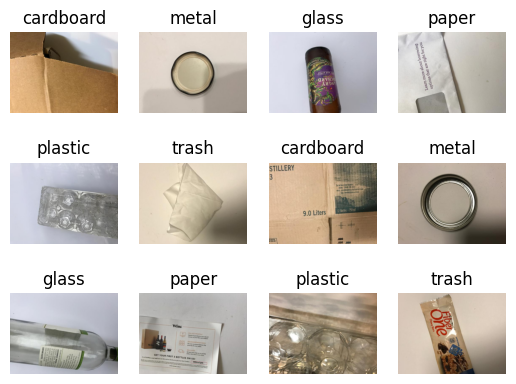

In [7]:
for k, class_ in enumerate(classes):
    for j in range(2):
        im = random.sample(os.listdir(os.path.join('/content/drive/MyDrive/trash_data', 'train', class_)), 2)
        im = Image.open(os.path.join('/content/drive/MyDrive/trash_data', 'train', class_, im[j]))
        plt.subplot(3, 4, (k+1+(j*6)))
        plt.axis('off')
        plt.title(class_)
        plt.imshow(im)

In [8]:
def get_image_dimensions(directory):
    image_dimensions = set()
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                with Image.open(file_path) as img:
                    image_dimensions.add((img.size))
    return image_dimensions

image_dimensions = get_image_dimensions('/content/drive/MyDrive/trash_data')
print(image_dimensions)

{(512, 384)}


In [9]:
model = models.Sequential([layers.Conv2D(32, (3,3), input_shape = (300, 300, 3), activation = 'relu'),
                            layers.MaxPool2D((2,2)),
                            layers.MaxPool2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(50, activation = 'relu'),
                            layers.Dense(6, activation = 'softmax')])

In [10]:
model.compile(optimizer = 'adam', loss = keras.losses.CategoricalCrossentropy(), metrics = 'accuracy')

In [13]:
train_data_generator = ImageDataGenerator(rescale = 1/255)
val_data_generator = ImageDataGenerator(rescale = 1/255)

train_data = train_data_generator.flow_from_directory('/content/drive/MyDrive/trash_data/train', target_size = (300, 300), batch_size = 50)
val_data = val_data_generator.flow_from_directory('/content/drive/MyDrive/trash_data/validation', target_size = (300, 300), batch_size = 50)

Found 1771 images belonging to 6 classes.
Found 603 images belonging to 6 classes.


In [14]:
history = model.fit(train_data,
                    steps_per_epoch = 35,
                    epochs = 10,
                    verbose = 1,
                    validation_data = val_data,
                    validation_steps = 250)

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 1.4482 - accuracy: 0.4381

35/35 [==============================] - 146s 4s/step - loss: 1.4482 - accuracy: 0.4381 - val_loss: 1.3708 - val_accuracy: 0.4577
Epoch 2/10
35/35 [==============================] - 122s 3s/step - loss: 1.1943 - accuracy: 0.5578
Epoch 3/10
35/35 [==============================] - 135s 4s/step - loss: 0.9990 - accuracy: 0.6519
Epoch 4/10
35/35 [==============================] - 124s 4s/step - loss: 0.8039 - accuracy: 0.7356
Epoch 5/10
35/35 [==============================] - 124s 4s/step - loss: 0.6634 - accuracy: 0.7827
Epoch 6/10
35/35 [==============================] - 126s 4s/step - loss: 0.5005 - accuracy: 0.8681
Epoch 7/10
35/35 [==============================] - 124s 4s/step - loss: 0.4195 - accuracy: 0.8815
Epoch 8/10
35/35 [==============================] - 137s 4s/step - loss: 0.3323 - accuracy: 0.9198
Epoch 9/10
35/35 [==============================] - 125s 4s/step - loss: 0.2580 - accuracy: 0.9419
Epoch 10/10
35/35 [==============================] - 125s 4s/step - loss: 0.20

In [ ]:
history.history

In [16]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
